<a href="https://colab.research.google.com/github/elangbijak4/Quantum_Security_Research/blob/main/Demo_Protokol_Quantum_Teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Catatan: Protokol ini tidak menggunakan kanal komunikasi klasik seperti protokol quantum key distribution (QKD), murni seluruhnya kuantum, baik paket informasi (state kuantum) maupun kanal komunikasi (entanglement atau Implementasi pelanggaran Sirkuit lokal Bell's).  

In [ ]:
!pip install cirq

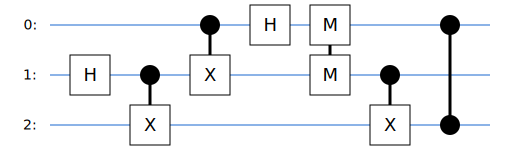

Measurement results:
q(0),q(1)=101010100111111110101110101010000011100011000100110100000010100110100110100001011010000110110011101001100001110001101010100110010100011011000000000011101001100011001000110111011111001101110110000001110101110101100011110001100001001011001010111010000000101001110101101110110111111101100100010111010000010101111110101101111011000000001011000000100010100110001001101011111101011001101011011100011100111010101101111000011101100001101000000100101001010110100101011110101010011001110110110101100001000110111011001001011000011011011110001000001110100111010001111010011111110000110100100001110000000000110011001111100111100010011011101010111101111100111101000110101110110001110001001000100000110000001101110001011111111110010101111101111001010011110000010100110001110010111101110000110110001000001101010101101011010000111111101111100011000001111001111001011001011110000000110111101101110010011001010100100001101011011010110001010001010110000101000101100111010111110111000100010

In [19]:
import cirq
from cirq.contrib.svg import SVGCircuit
from cirq import Simulator
from IPython.display import SVG, display
#import matplotlib.pyplot as plt

# Function to create a quantum teleportation circuit
def create_teleportation_circuit():
    # Create quantum register
    qubits = cirq.LineQubit.range(3)  # 0: Tx, 1: Entangled, 2: Rx

    circuit = cirq.Circuit()

    # Step 1: Prepare entangled pair between Tx (Alice) and Rx (Bob)
    circuit.append(cirq.H(qubits[1]))  # Hadamard gate for the entangled qubit (Hadamard at Rx)
    circuit.append(cirq.CNOT(qubits[1], qubits[2]))  # CNOT gate between the entangled qubit and Rx

    # Step 2: Alice sends the quantum state she wants to teleport to the entangled qubit
    circuit.append(cirq.CNOT(qubits[0], qubits[1]))  # CNOT gate between the qubit to be teleported (Tx) and the entangled qubit
    circuit.append(cirq.H(qubits[0]))  # Hadamard gate on the qubit to be teleported (Tx)

    # Step 3: Alice measures the qubit to be teleported and the entangled qubit
    circuit.append(cirq.measure(qubits[0], qubits[1]))  # Measurement at Tx and the entangled qubit

    # Step 4: Bob applies X and Z gates based on the measurement results to reconstruct the state
    circuit.append(cirq.CNOT(qubits[1], qubits[2]))  # CNOT gate at the entangled qubit and Rx
    circuit.append(cirq.CZ(qubits[0], qubits[2]))    # CZ gate between the qubit to be teleported (Tx) and Rx

    return circuit

# Create the teleportation circuit
teleportation_circuit = create_teleportation_circuit()

# Display the circuit in SVG format
svg_circuit = SVGCircuit(teleportation_circuit)  # Create SVGCircuit object
display(svg_circuit)

# Simulate the circuit
simulator = cirq.Simulator()
result = simulator.run(teleportation_circuit, repetitions=1000)

# Display the measurement results in text
print("Measurement results:")
print(result)